# Notebook 02: Dose-Response Analysis (ORR)

## Purpose
This notebook simulates virtual patient populations across a range of epcoritamab doses to characterize the dose-response relationship for Overall Response Rate (ORR). This analysis supports dose selection and helps validate the model's ability to predict clinical outcomes.

## Contents
1. **Population Simulations**: Run 100+ virtual patients at each dose level (0.0128 - 60 mg)
2. **ORR Calculation**: Compute response rates based on tumor reduction criteria (default: >30% reduction)
3. **Dose-Response Curve**: Plot ORR vs dose to identify optimal dosing range
4. **Patient-Level Analysis**: Examine individual tumor trajectories and variability

## Key Dose Levels
- **Low doses** (0.0128 - 0.38 mg): Priming doses
- **Intermediate doses** (0.76 - 6 mg): Intermediate/step-up doses  
- **High doses** (12 - 60 mg): Full therapeutic doses

## Simulation Settings
- **Patients per dose**: 128 virtual patients
- **Simulation time**: 84 days (12 weeks)
- **Response criterion**: Tumor reduction > 30% from baseline
- **Parallel execution**: Multi-core processing for faster runtime

## Usage
Run the full notebook to generate dose-response curves. Results are stored in `all_results` dictionary for further analysis.

---


In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt 
import numpy as np

NOTEBOOK_DIR = Path().resolve()
PROJECT_ROOT = NOTEBOOK_DIR.parent  

sys.path.append(str(PROJECT_ROOT))
print("Added to sys.path:", PROJECT_ROOT)

Added to sys.path: D:\User Data\Downloads\epcoritamab-pbpk-pd


[Main] Building regimen for 0.0128 mg
[Main] Dose 0.0128 mg: timeout=15.0s, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400
[Main] Starting population: n_patients=128, backend=loky, n_jobs=-1
[Main] Timeout per patient: 15.0s
[Main] Using sequential execution (stable)
[Main] Timeout per patient: 15.0s


Patients:   0%|          | 0/128 [00:00<?, ?it/s]

[Main] Completed 128 patients in 52.43s (0.41s per patient)
[Main] Building regimen for 0.064 mg
[Main] Dose 0.064 mg: timeout=15.0s, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400
[Main] Starting population: n_patients=128, backend=loky, n_jobs=-1
[Main] Timeout per patient: 15.0s
[Main] Using sequential execution (stable)
[Main] Timeout per patient: 15.0s


Patients:   0%|          | 0/128 [00:00<?, ?it/s]

[Main] Completed 128 patients in 54.92s (0.43s per patient)
[Main] Building regimen for 0.32 mg
[Main] Dose 0.32 mg: timeout=15.0s, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400
[Main] Starting population: n_patients=128, backend=loky, n_jobs=-1
[Main] Timeout per patient: 15.0s
[Main] Using sequential execution (stable)
[Main] Timeout per patient: 15.0s


Patients:   0%|          | 0/128 [00:00<?, ?it/s]

[Main] Completed 128 patients in 59.31s (0.46s per patient)
[Main] Building regimen for 1.6 mg
[Main] Dose 1.6 mg: timeout=15.0s, rtol=1e-04, atol=1e-07, max_step=None, n_t_eval=400
[Main] Starting population: n_patients=128, backend=loky, n_jobs=-1
[Main] Timeout per patient: 15.0s
[Main] Using sequential execution (stable)
[Main] Timeout per patient: 15.0s


Patients:   0%|          | 0/128 [00:00<?, ?it/s]

[Main] Completed 128 patients in 65.60s (0.51s per patient)
[Main] Building regimen for 8 mg
[Main] Dose 8 mg: timeout=30.0s, rtol=2e-04, atol=2e-07, max_step=1.0, n_t_eval=350
[Main] Starting population: n_patients=128, backend=loky, n_jobs=-1
[Main] Timeout per patient: 30.0s
[Main] Using sequential execution (stable)
[Main] Timeout per patient: 30.0s


Patients:   0%|          | 0/128 [00:00<?, ?it/s]

[Main] Completed 128 patients in 93.24s (0.73s per patient)
[Main] Building regimen for 24 mg
[Main] Dose 24 mg: timeout=60.0s, rtol=5e-04, atol=5e-07, max_step=0.5, n_t_eval=300
[Main] Starting population: n_patients=128, backend=loky, n_jobs=-1
[Main] Timeout per patient: 60.0s
[Main] Using sequential execution (stable)
[Main] Timeout per patient: 60.0s


Patients:   0%|          | 0/128 [00:00<?, ?it/s]

[Main] Completed 128 patients in 112.10s (0.88s per patient)
[Main] Building regimen for 48 mg
[Main] Dose 48 mg: timeout=90.0s, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250
[Main] Starting population: n_patients=128, backend=loky, n_jobs=-1
[Main] Timeout per patient: 90.0s
[Main] Using sequential execution (stable)
[Main] Timeout per patient: 90.0s


Patients:   0%|          | 0/128 [00:00<?, ?it/s]

[Main] Completed 128 patients in 85.45s (0.67s per patient)
[Main] WARNING: 9 / 128 patients failed ODE solve.
[Main] Building regimen for 60 mg
[Main] Dose 60 mg: timeout=90.0s, rtol=1e-03, atol=1e-06, max_step=0.3, n_t_eval=250
[Main] Starting population: n_patients=128, backend=loky, n_jobs=-1
[Main] Timeout per patient: 90.0s
[Main] Using sequential execution (stable)
[Main] Timeout per patient: 90.0s


Patients:   0%|          | 0/128 [00:00<?, ?it/s]

[Main] Completed 128 patients in 92.29s (0.72s per patient)
[Main] WARNING: 10 / 128 patients failed ODE solve.


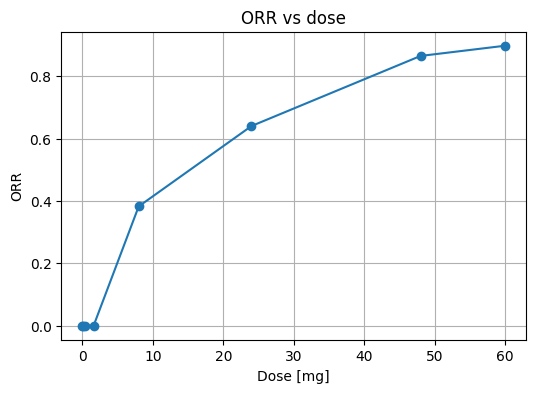

In [2]:
from tqdm import tqdm

from src.epco_model.monte_carlo import run_population_for_dose_parallel
from src.epco_model.plotting import plot_ORR_vs_dose
# Dose grid
doses_mg = [0.0128, 0.064, 0.32, 1.6, 8, 24, 48, 60]

ORRs = []
all_results = {}

for i, d in enumerate(doses_mg): 
    df = run_population_for_dose_parallel(
        full_mg=d,
        n_patients=128,  
        priming_fraction=0.1,
        intermediate_fraction=0.5,
        t_end=84,
        tumor_fraction_cutoff=0.3,
        seed=123 + i,
        backend="loky",
        n_jobs=-1,
    )
    ORRs.append(df.loc[~df["failed"], "responder"].mean())
    # ORRs.append(df["responder"].mean())
    all_results[d] = df

plot_ORR_vs_dose(doses_mg, ORRs)
plt.show()